# Shockley Partials

## Set Up Virtual Environment
The following creates a virtual environment folder for this project, sets it up correctly, and activates the virtual environment.

In [1]:
import os
venvExists = os.path.isdir('venv')
if venvExists is False:
    os.mkdir("venv")
    os.system("python -m venv venv")
    os.system("pip install -r requirements.txt")
os.system(r"venv\Scripts\activate")

import numpy as np
import matplotlib.pyplot as plt

## Classical Theory
https://pubs.aip.org/aip/jap/article/42/1/238/8490/Short-Range-Interactions-Between-Two-Parallel

$F_x = \frac{G b^2 L}{6 \pi d}\left( \cos(\alpha+\frac{\pi}{6})\cos(\alpha-\frac{\pi}{6}) + \frac{\sin(\alpha+\frac{\pi}{6})\sin(\alpha-\frac{\pi}{6})}{1-\nu} \right)$

Where:
 - $d$ is the distance between the two Shockley partials
 - $F_x$ is repulsive
 - $G$ is shear modulus
 - $\alpha_{edge}=\frac{\pi}{2}$ & $\alpha_{screw}=0$
 - $L$ - Dislocation line length [m]
 - $b$ - Burgers vector [m]
 - $\nu$ - Poisson's Ratio

In [125]:
def get_Fx_classical(G, b, L, d, alpha, nu):
    num = (G*(b**2)*L)
    denom = (6*np.pi*d)
    preFactor = num/denom
    r = np.pi/6
    rhs = (np.cos(alpha+r)*np.cos(alpha-r)) + ((np.sin(alpha+r)*np.sin(alpha-r))/(1-nu))
    Fx = preFactor*rhs
    return Fx

def gamma_prime_page239(b):
    return 2*b

def equations_24_25_simplified(G, b, L, d, alpha, nu):
    # As these equations are the full dislocation core energy equations
    # then below is the simplified ones used in the lecture course.
    if alpha == 0:
        gamma = 0.5*G*(b**2)
    elif alpha == np.pi/2:
        gamma = 0.5*G*(b**2)/(1-nu)
    return gamma

def get_Fx_mod_Peierls(G, b, L, d, alpha, nu):
    num = (G*(b**2)*L*d)
    denom = (6*np.pi)
    preFactor = num/denom
    gp = gamma_prime_page239(b)
    g_p_s = (gp)**2
    a = (d/gp)**2
    r = np.pi/6
    rhs = ((np.cos(alpha+r)*np.cos(alpha-r))/(g_p_s*(a+4.15))) + ((np.sin(alpha+r)*np.sin(alpha-r))/((1-nu)*g_p_s*(a+4)))
    Fx = preFactor*rhs
    return Fx



## Main Section
Where:
 - $d$ is the distance between the two Shockley partials
 - $F_x$ is repulsive
 - $G$ is shear modulus
 - $\alpha_{edge}=\frac{\pi}{2}$ & $\alpha_{screw}=0$
 - $L$ - Dislocation line length [m]
 - $b$ - Burgers vector [m]
 - $\nu$ - Poisson's Ratio

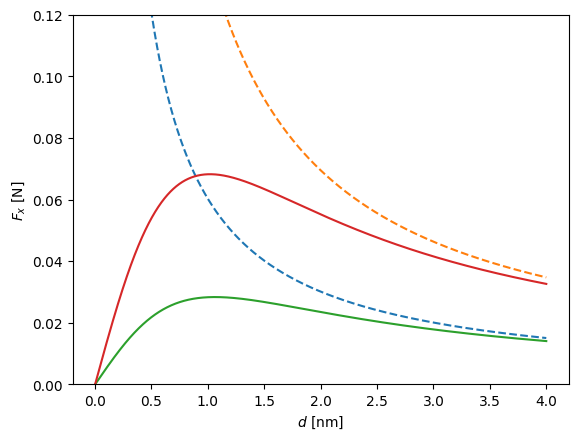

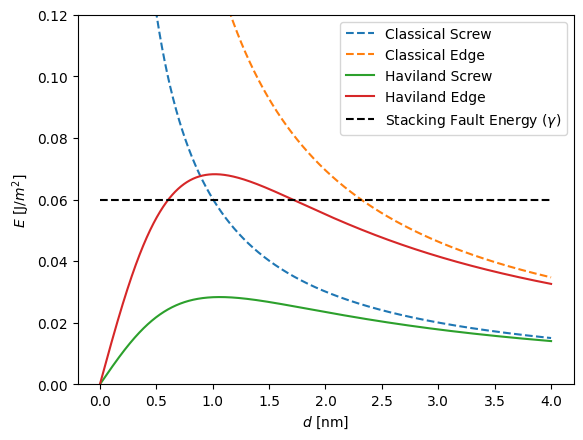

In [157]:
G = 46E9 # in Pa
L = 1 # m
b = 2.56E-10 # m
nu = 0.33
d = np.linspace(0.01*b,4E-9,10000)
gamma = 60E-3 # J/m^2
areas = L*d
SF_energy = gamma*areas

normON = False # Leave False
if normON:
    normY = (G*b*L)/(48*np.pi)
    normX = b
    xlabel = '$d/b$ [1]'
    ylabel = r'$(F_x \div \frac{GbL}{48 \pi})$ [1]'
else:
    # xlabel = '$d$ [nm]'
    # normX = 1E-9
    # ylabel = '$F_x$ [mN]'
    # normY = 1E-3

    xlabel = '$d$ [nm]'
    normX = 1E-9
    ylabel = '$F_x$ [N]'
    normY = 1
    # normX = b
    # xlabel = '$d/b$ [1]'

Fx_c_s = get_Fx_classical(G, b, L, d, 0, nu)
Fx_c_e = get_Fx_classical(G, b, L, d, np.pi/2, nu)
Fx_m_s = get_Fx_mod_Peierls(G, b, L, d, 0, nu)
Fx_m_e = get_Fx_mod_Peierls(G, b, L, d, np.pi/2, nu)

plt.figure
plt.plot(d/normX, Fx_c_s/normY, ls='--', label='Classical Screw')
plt.plot(d/normX, Fx_c_e/normY, ls='--', label='Classical Edge')
plt.plot(d/normX, Fx_m_s/normY, label='Haviland Screw')
plt.plot(d/normX, Fx_m_e/normY, label='Haviland Edge')
if normON:
    plt.ylim(top=1.2, bottom=0)
    plt.xlim(left=0, right=16)
else:
    plt.ylim(top=0.12, bottom=0)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

# plt.ylim(top=1.2, bottom=0)
# plt.xlim(left=0, right=0.4E-9)

plt.figure
plt.plot(d/normX, Fx_c_s/(normY*L), ls='--', label='Classical Screw')
plt.plot(d/normX, Fx_c_e/(normY*L), ls='--', label='Classical Edge')
plt.plot(d/normX, Fx_m_s/(normY*L), label='Haviland Screw')
plt.plot(d/normX, Fx_m_e/(normY*L), label='Haviland Edge')
plt.hlines(gamma, xmin=np.min(d/normX), xmax=np.max(d/normX), linestyles='--', colors='k', label=r'Stacking Fault Energy ($\gamma$)')
if normON:
    plt.ylim(top=1.2, bottom=0)
    plt.xlim(left=0, right=16)
else:
    plt.ylim(top=0.12/L, bottom=0)
    plt.ylabel('$E$ [J/$m^2$]') # 
    plt.xlabel(xlabel)
plt.legend()
plt.show()
